Import Libraries

In [ ]:
import json
import numpy as np
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import networkx as nx
from adjustText import adjust_text

Load Word2Vec Model and Define Topics

In [10]:
w2v_model = KeyedVectors.load_word2vec_format('words.sg.s200.w2v.bin', binary=True)

topics = [
    "text similarity measure",
    "semantic similarity",
    "information retrieval",
    "keyword extraction",
    "text summarization",
    "classification",
    "clustering",
    "topic modelling",
    "sentiment analysis"
]

Load and Organize Data

In [11]:
files = [
    'papers-semeval-2021.json',
    'papers-semeval-2022.json',
    'papers-semeval-2023.json',
    'papers-semeval-2024.json'
]

abstracts_by_year = {}
keywords_by_year = {}

for filename in files:
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
        year = filename[15:19]
        abstracts_by_year[year] = [item['abstract'] for item in data]

Keyword Extraction with KeyBERT

In [12]:
kw_model = KeyBERT()

for year, abstracts in abstracts_by_year.items():
    text = ' '.join(abstracts)
    keywords = kw_model.extract_keywords(
        text,
        keyphrase_ngram_range=(1, 1),
        stop_words='english',
        top_n=300
    )
    keywords_by_year[year] = [kw[0] for kw in keywords]

Semantic Similarity Calculation

In [13]:
def calculate_word2vec_similarity(topics, keywords_by_year, model):
    results_by_year = {}

    for year, keywords in keywords_by_year.items():
        topic_keyword_scores = {}
        for topic in topics:
            topic_vector = get_sentence_vector(topic.split(), model)
            topic_keyword_scores[topic] = []
            for keyword in keywords:
                keyword_vector = get_sentence_vector(keyword.split(), model)
                sim = cosine_similarity([topic_vector], [keyword_vector])[0][0]
                topic_keyword_scores[topic].append((keyword, sim))

            topic_keyword_scores[topic].sort(key=lambda x: x[1], reverse=True)
        results_by_year[year] = topic_keyword_scores

    return results_by_year

def get_sentence_vector(tokens, model):
    vectors = [model[token] for token in tokens if token in model.key_to_index]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

Graph Construction

In [14]:
def build_topic_keyword_graph(results_by_year, year):
    G = nx.Graph()
    added_keywords = set()

    for topic, keywords in results_by_year[year].items():
        G.add_node(topic, size=1000, color='steelblue')
        for keyword, score in keywords[:5]:  
            if keyword not in added_keywords:
                G.add_node(keyword, size=score * 3000, color='lightblue')
                added_keywords.add(keyword)
            G.add_edge(topic, keyword, weight=score)
    return G

def plot_topic_keyword_graph(G, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)

    node_sizes = [nx.get_node_attributes(G, 'size').get(node, 300) for node in G.nodes()]
    node_colors = [nx.get_node_attributes(G, 'color').get(node, 'gray') for node in G.nodes()]

    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

    texts = [plt.text(x, y, node, fontsize=8, ha='center', va='center') for node, (x, y) in pos.items()]
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Results Visualization


Year: 2021
Topic: text similarity measure
 - text: 0.9623
 - organize: 0.8472
 - phrase: 0.8321
 - translation: 0.8291
 - retrieval: 0.8203
Topic: semantic similarity
 - semantic: 1.0000
 - computational: 0.9256
 - objectives: 0.9250
 - discourse: 0.9143
 - sentence: 0.9117
Topic: information retrieval
 - context: 0.8674
 - neural: 0.8609
 - units: 0.8541
 - campaign: 0.8521
 - comprehensive: 0.8448
Topic: keyword extraction
 - keyword: 0.9674
 - objectives: 0.9170
 - neural: 0.9162
 - retrieval: 0.9159
 - parser: 0.9130
Topic: text summarization
 - text: 1.0000
 - organize: 0.7193
 - retrieval: 0.7062
 - translation: 0.7023
 - span: 0.7004
Topic: classification
 - classification: 1.0000
 - objectives: 0.9283
 - comprehensive: 0.9097
 - comparative: 0.9073
 - context: 0.9000
Topic: clustering
 - semantic: 0.8815
 - retrieval: 0.8595
 - computational: 0.8581
 - prediction: 0.8569
 - objectives: 0.8531
Topic: topic modelling
 - capable: 0.8453
 - phrase: 0.8452
 - organize: 0.8410
 - si

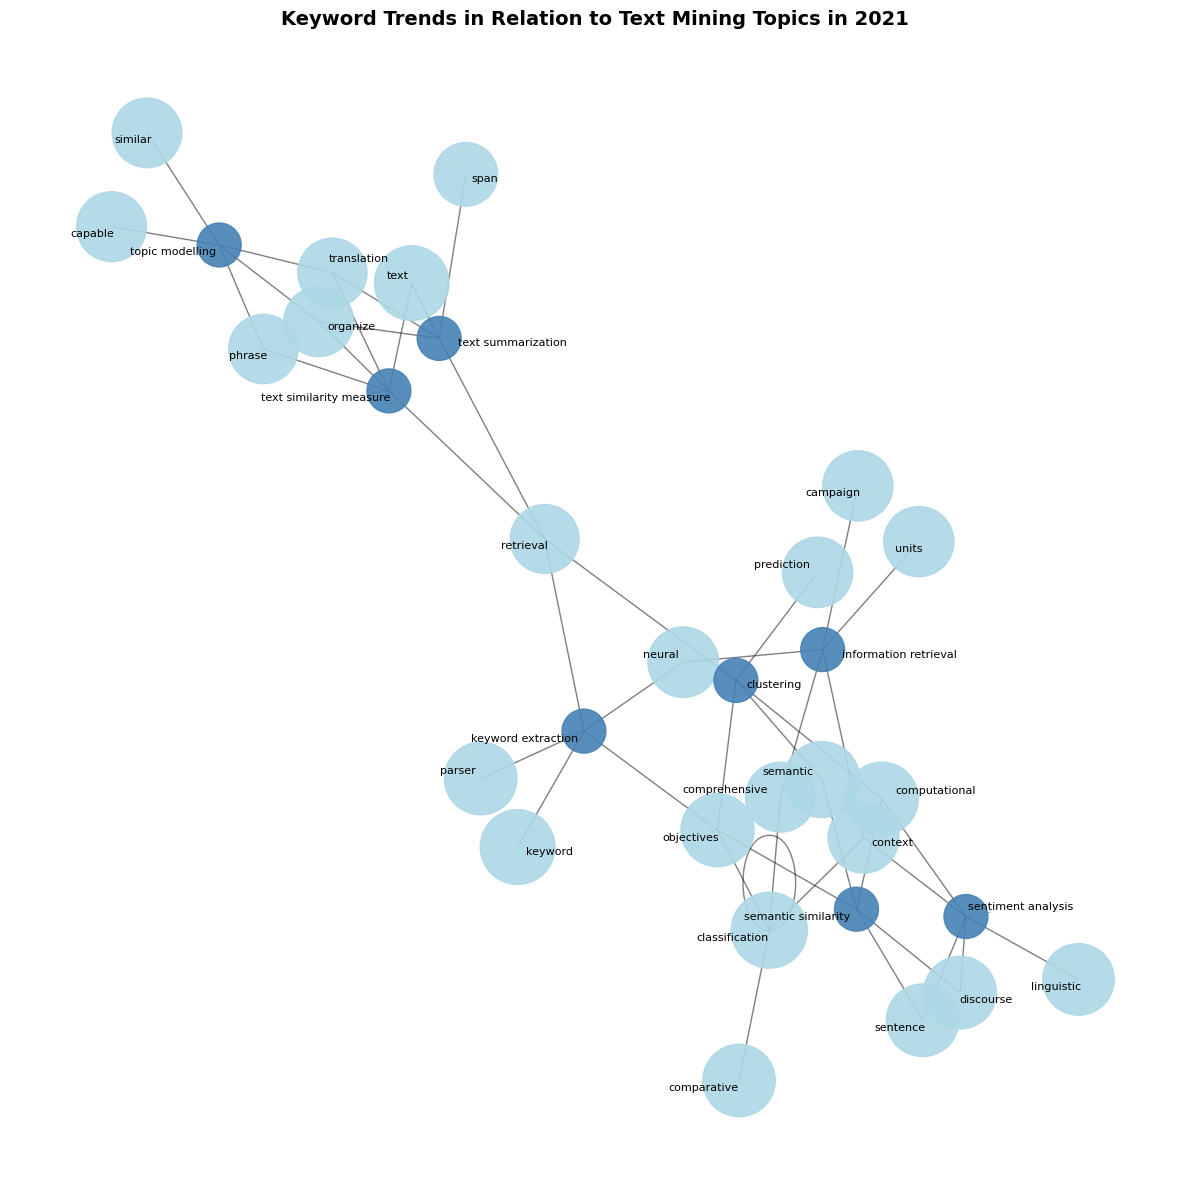


Year: 2022
Topic: text similarity measure
 - text: 0.9623
 - encoding: 0.8787
 - syntax: 0.8575
 - characterize: 0.8340
 - translation: 0.8291
Topic: semantic similarity
 - semantic: 1.0000
 - definitions: 0.9147
 - metaphor: 0.9101
 - representation: 0.9069
 - recall: 0.9044
Topic: information retrieval
 - neural: 0.8609
 - resource: 0.8407
 - classification: 0.8396
 - description: 0.8374
 - translation: 0.8371
Topic: keyword extraction
 - keyword: 0.9674
 - neural: 0.9162
 - parser: 0.9130
 - span: 0.9109
 - description: 0.9100
Topic: text summarization
 - text: 1.0000
 - encoding: 0.8083
 - syntax: 0.7737
 - parse: 0.7122
 - translation: 0.7023
Topic: classification
 - classification: 1.0000
 - representation: 0.9091
 - recurrent: 0.8945
 - entity: 0.8942
 - semantic: 0.8933
Topic: clustering
 - semantic: 0.8815
 - metaphor: 0.8494
 - keyword: 0.8494
 - parser: 0.8448
 - definitions: 0.8428
Topic: topic modelling
 - characterize: 0.8394
 - translation: 0.8330
 - keyword: 0.8264
 - 

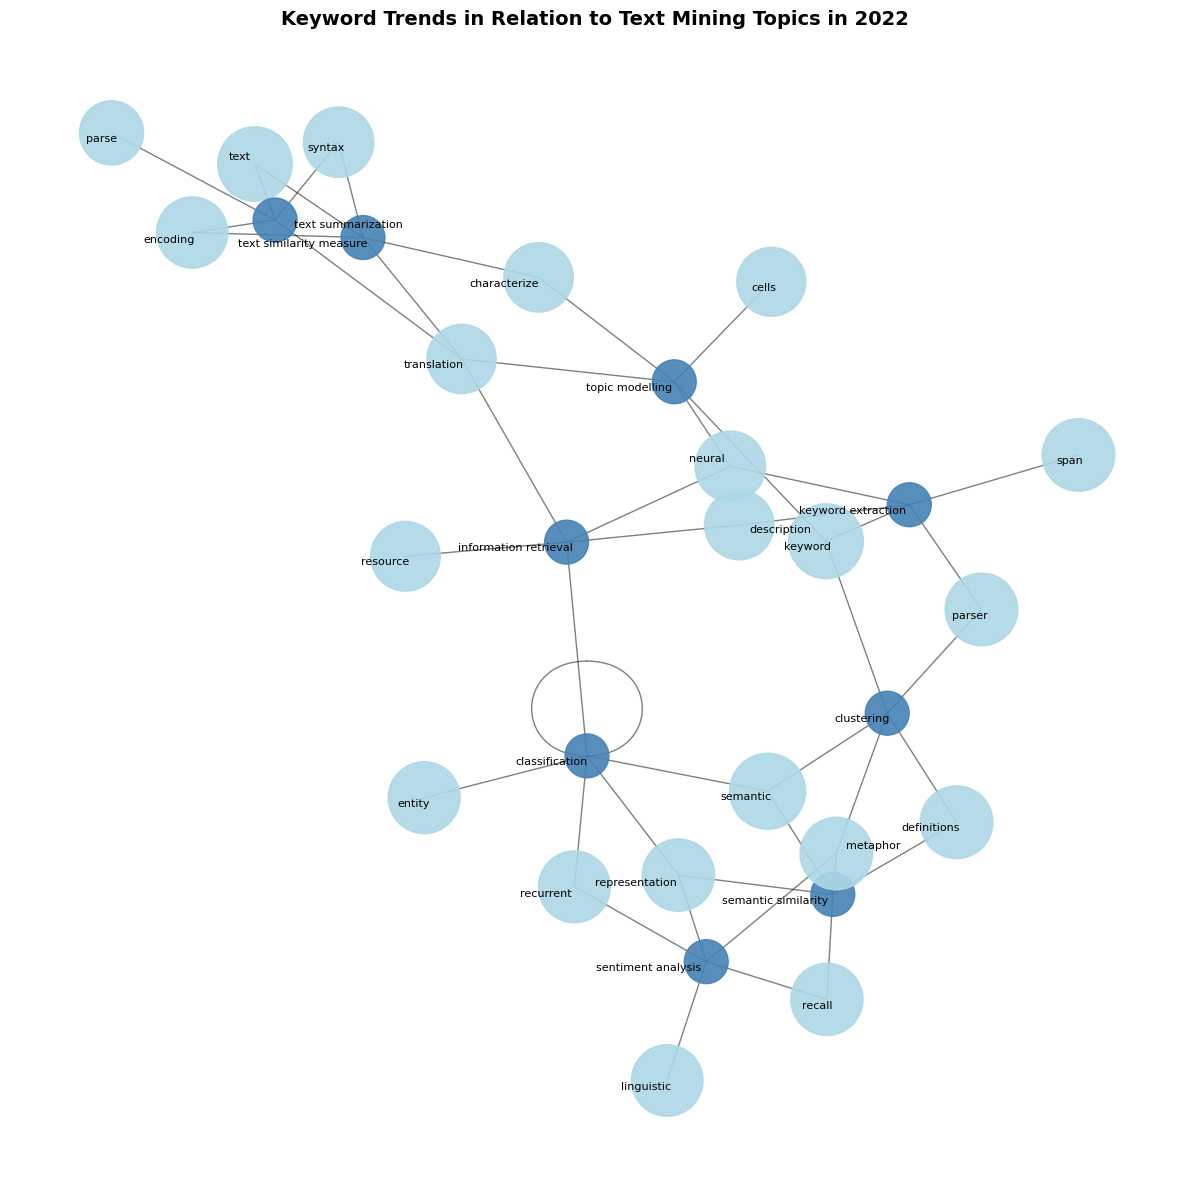


Year: 2023
Topic: text similarity measure
 - text: 0.9623
 - documents: 0.8489
 - messages: 0.8396
 - reporting: 0.8349
 - document: 0.8334
Topic: semantic similarity
 - semantic: 1.0000
 - sentence: 0.9117
 - validity: 0.9086
 - recall: 0.9044
 - validation: 0.9024
Topic: information retrieval
 - information: 0.9851
 - neural: 0.8609
 - campaign: 0.8521
 - validation: 0.8490
 - reporting: 0.8439
Topic: keyword extraction
 - neural: 0.9162
 - retrieval: 0.9159
 - validation: 0.9132
 - parser: 0.9130
 - description: 0.9100
Topic: text summarization
 - text: 1.0000
 - documents: 0.7799
 - prompt: 0.7588
 - messages: 0.7579
 - document: 0.7552
Topic: classification
 - classification: 1.0000
 - procedures: 0.9112
 - clinical: 0.9014
 - validation: 0.8995
 - validity: 0.8988
Topic: clustering
 - semantic: 0.8815
 - retrieval: 0.8595
 - parser: 0.8448
 - tasks: 0.8400
 - neural: 0.8301
Topic: topic modelling
 - phrase: 0.8452
 - trained: 0.8392
 - validation: 0.8361
 - statements: 0.8315
 -

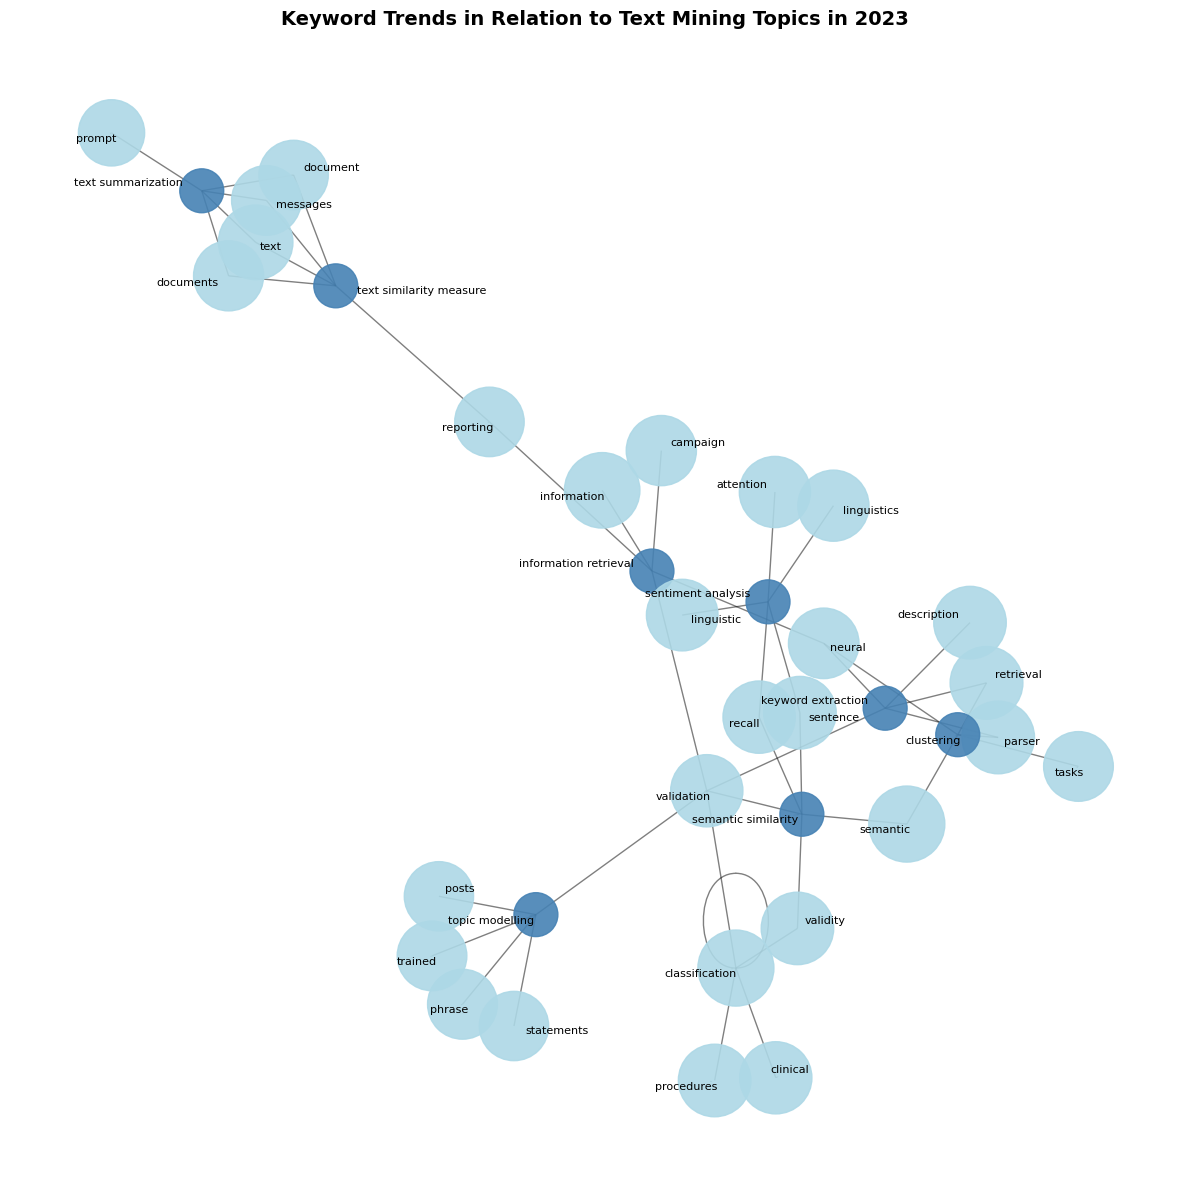


Year: 2024
Topic: text similarity measure
 - text: 0.9623
 - encoding: 0.8787
 - create: 0.8550
 - documents: 0.8489
 - generated: 0.8403
Topic: semantic similarity
 - semantic: 1.0000
 - computational: 0.9256
 - recall: 0.9044
 - validation: 0.9024
 - linguistic: 0.9016
Topic: information retrieval
 - validation: 0.8490
 - concepts: 0.8439
 - processing: 0.8435
 - classification: 0.8396
 - creating: 0.8382
Topic: keyword extraction
 - programming: 0.9171
 - retrieval: 0.9159
 - generated: 0.9159
 - validation: 0.9132
 - detection: 0.9051
Topic: text summarization
 - text: 1.0000
 - encoding: 0.8083
 - create: 0.7863
 - documents: 0.7799
 - headline: 0.7230
Topic: classification
 - classification: 1.0000
 - statistical: 0.9006
 - validation: 0.8995
 - computational: 0.8989
 - semantic: 0.8933
Topic: clustering
 - semantic: 0.8815
 - retrieval: 0.8595
 - sequencing: 0.8590
 - computational: 0.8581
 - prediction: 0.8569
Topic: topic modelling
 - topic: 0.9194
 - programming: 0.8466
 - t

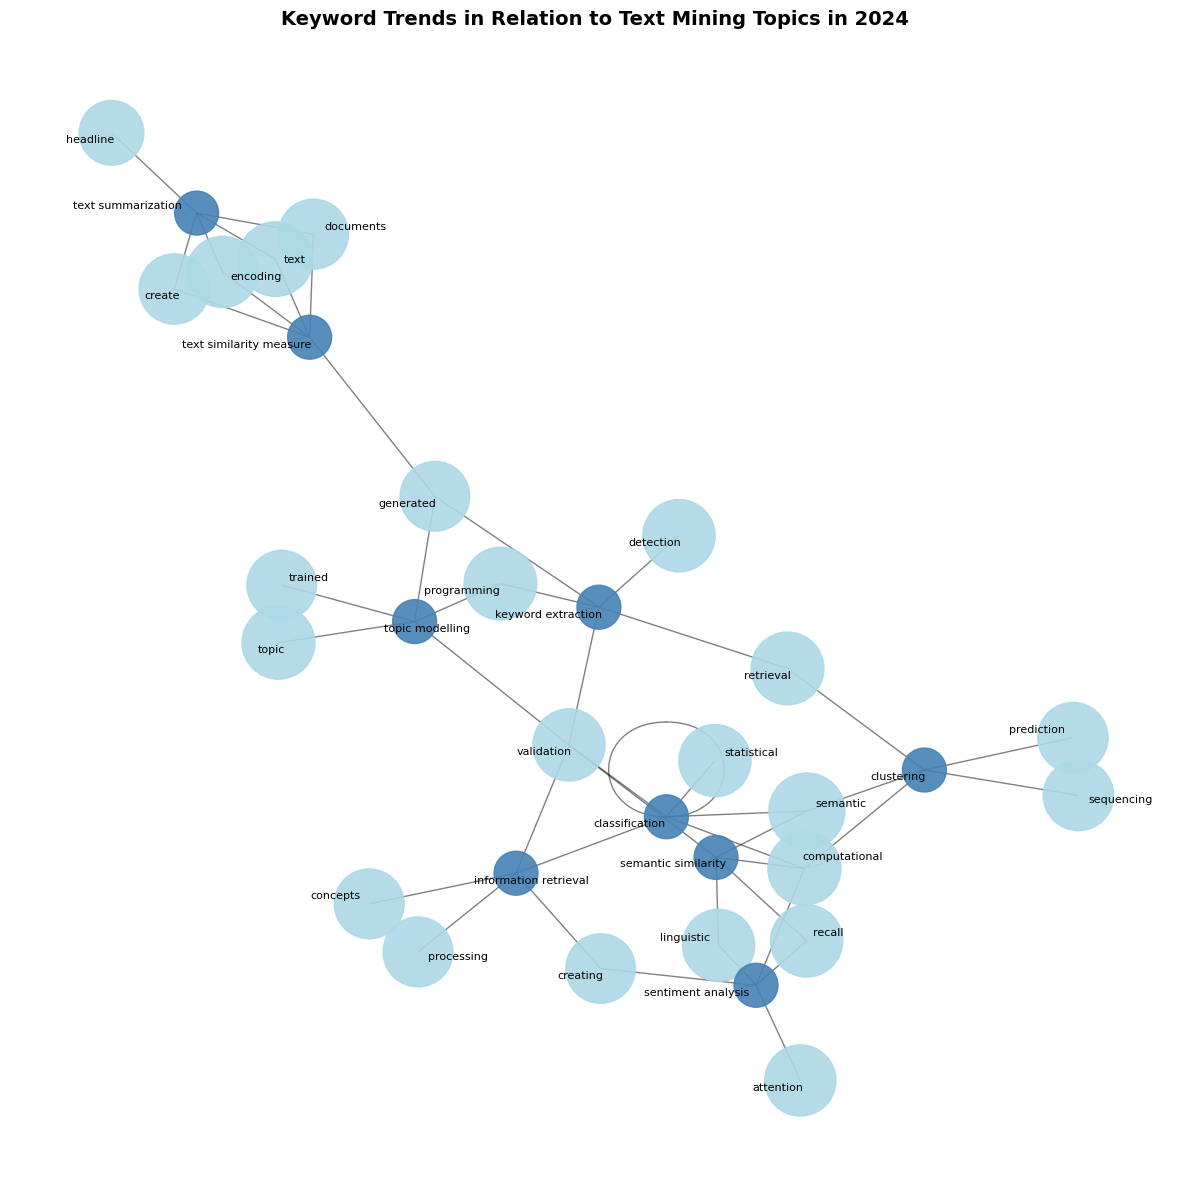

In [15]:
def visualize_results(results_by_year):
    for year in sorted(results_by_year.keys()):
        print(f"\nYear: {year}")
        for topic, keywords in results_by_year[year].items():
            print(f"Topic: {topic}")
            for keyword, score in keywords[:5]:
                print(f" - {keyword}: {score:.4f}")
        G = build_topic_keyword_graph(results_by_year, year)
        plot_topic_keyword_graph(G, title=f"Keyword Trends in Relation to Text Mining Topics in {year}")

results_by_year = calculate_word2vec_similarity(topics, keywords_by_year, w2v_model)
visualize_results(results_by_year)